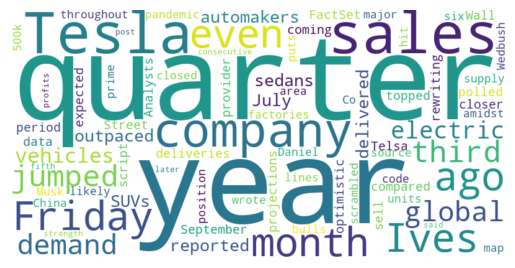

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "Tesla's third-quarter sales jumped 44%\ as global demand for its electric vehicles outpaced that of most other automakers. The company reported Friday that it had delivered 139,000 SUVs and sedans from July through September, compared with 97,000 deliveries during the same period a year ago. The sales topped even some of the most optimistic projections coming from Wall Street. Analysts polled by data provider FactSet expected the company to sell closer to 137,000. Telsa has been rewriting the script throughout the year amidst a pandemic that has closed factories and scrambled supply lines. “This puts Musk & Co. in prime position to hit the area code of 500k units for the year which six months ago was not even on the map for the bulls,'\" Daniel Ives of Wedbush wrote Friday. China was likely a major source of strength in the quarter, Ives said. Tesla could post its fifth consecutive quarter of profits later this month."
origin_text = text
wc = WordCloud(background_color="white", width=800, height=400)
wordcloud = wc.generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Q2

In [2]:
# pre-process the text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from readability import Readability

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
text = text.translate(str.maketrans('', '', string.punctuation))
text = re.sub('[0-9]+', '', text)
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)

mydict = pd.ExcelFile('LM.xlsx')
df = pd.read_excel('LM.xlsx', sheet_name='StrongModal', header=None)
word_tokens = [w.lower() for w in word_tokens]
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10445\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\10445\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
score_dict = {}
for sh in mydict.sheet_names:
    if sh == 'Documentation':
        continue
    df = pd.read_excel('LM.xlsx', sheet_name=sh, header=None)
    df = df[0].str.lower()
    temp_score = 0
    for w in df.values.tolist():
        temp_score += sum([True for fw in filtered_sentence if fw == w])
    score_dict[sh] = temp_score

In [9]:
length = len(filtered_sentence)
(score_dict['Positive'] - score_dict['Negative']) / length

0.010869565217391304

### Q3

In [13]:
import textstat
gf = Readability(origin_text).gunning_fog()
textstat.gunning_fog(origin_text)

10.49

In [14]:
import syllables
diff_words = set()
for w in word_tokens:
    syllable_cnt = syllables.estimate(w)
    if syllable_cnt >= 3:
        diff_words.add(w)

sentence = nltk.sent_tokenize(origin_text)
fog = 0.4 * (len(word_tokens) / len(sentence) + 100 * (len(diff_words) / len(word_tokens)))
fog

13.389473684210527

### Q4

In [15]:
tesla = pd.read_excel("MDS6212 Week 5 Tesla.xlsx")
tesla[['Sentiment', 'Novelty', 'Impact']].describe()

,Sentiment,Novelty,Impact
count,1292.000000,1292.000000,1292.000000
mean,53.845975,28.877709,45.277864
std,14.824257,38.537946,9.996097
min,2.000000,0.000000,13.000000
25%,40.000000,0.000000,39.000000
50%,50.000000,3.000000,45.000000
75%,64.000000,56.000000,52.000000
max,100.000000,100.000000,77.000000


In [17]:
corr = tesla[['Sentiment', 'Novelty', 'Impact']].corr()
corr

,Sentiment,Novelty,Impact
Sentiment,1.000000,0.165557,-0.130972
Novelty,0.165557,1.000000,-0.064844
Impact,-0.130972,-0.064844,1.000000


In [20]:
top10 = tesla['Category'].value_counts().head(10)
total_freq = tesla['Category'].value_counts()
top10_prop = top10 / total_freq.sum()
print('Frequency:\n', top10)
print('Fraction:\n', top10_prop)

Frequency:
 Category
stock-loss                       409
stock-gain                       232
product-release                  111
business-contract                 63
capital-increase                  55
legal-verdict-favored             42
price-target-upgrade              40
fundraising                       33
acquisition-interest-acquirer     33
product-price-cut                 30
Name: count, dtype: int64
Fraction:
 Category
stock-loss                       0.316563
stock-gain                       0.179567
product-release                  0.085913
business-contract                0.048762
capital-increase                 0.042570
legal-verdict-favored            0.032508
price-target-upgrade             0.030960
fundraising                      0.025542
acquisition-interest-acquirer    0.025542
product-price-cut                0.023220
Name: count, dtype: float64
